[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


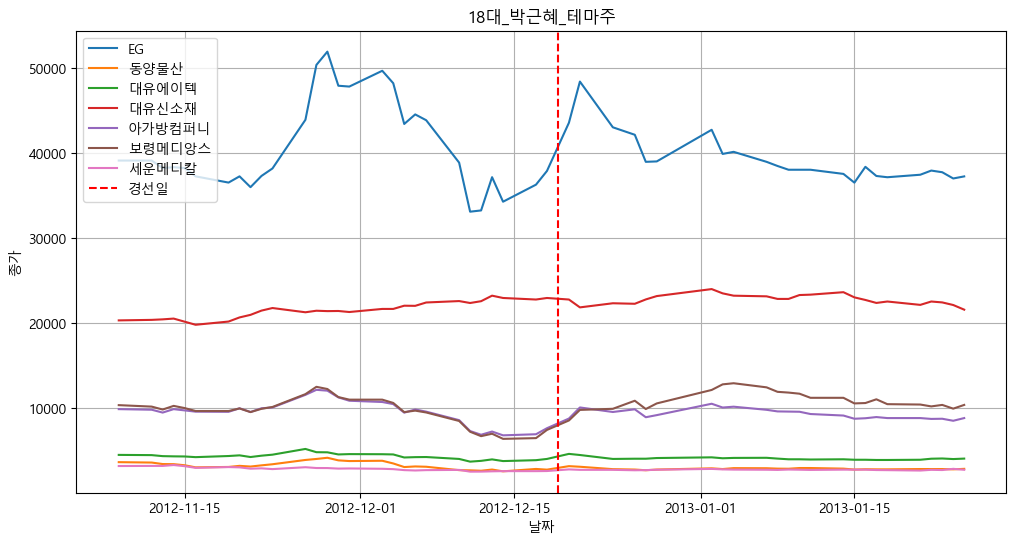

In [4]:
import yfinance  as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')  
mpl.rcParams['axes.unicode_minus'] = False

start_date = '2012-11-09' # 선거일 - 40
end_date = '2013-01-28' # 선거일 + 40

#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date)
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능
thema1 =  yf.download('037370.ks', start=start_date, end=end_date) #테마주1
thema2 =  yf.download('002900.ks', start=start_date, end=end_date)
thema3 =  yf.download('002880.ks', start=start_date, end=end_date)
thema4 =  yf.download('005930.ks', start=start_date, end=end_date)
thema6 = yf.download('013990.ks', start=start_date, end=end_date)
thema7 = yf.download('014100.ks', start=start_date, end=end_date)
thema8 = yf.download('100700.ks', start=start_date, end=end_date)


thema= pd.DataFrame()
#(1)에 추가했을 경우 이 부분도 추가해주세요
thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']



#(1)에 추가했을 경우 이 부분도 추가해주세요
plt.figure(figsize=(12, 6))
plt.plot(thema.index, thema['thema1'], label='EG')
plt.plot(thema.index, thema['thema2'], label='동양물산')
plt.plot(thema.index, thema['thema3'], label='대유에이텍')
plt.plot(thema.index, thema['thema4'], label='대유신소재')
plt.plot(thema.index, thema['thema6'], label='아가방컴퍼니')
plt.plot(thema.index, thema['thema7'], label='보령메디앙스')
plt.plot(thema.index, thema['thema8'], label='세운메디칼')
plt


#경선 일에 빨간 점선 줄
plt.axvline(x=pd.to_datetime('2012-12-19'), color='red', linestyle='--', label='경선일') #경선일을 수정하려면 datatime변수 수정해주시면 됩니다.

plt.xlabel('날짜')
plt.ylabel('종가')
plt.title('18대_박근혜_테마주')
plt.legend()
plt.grid(True)
plt.show()

label_dict = {
    'thema1': 'EG',
    'thema2': '동양물산',
    'thema3': '대유에이텍',
    'thema4': '대유신소재',
    'thema6' : '아가방컴퍼니',
    'thema7' : '보령메디앙스',
    'thema8' : '세운메디칼'
}

# 열 이름을 종목명으로 교체
thema_renamed = thema.rename(columns=label_dict)

# CSV로 저장 (index에 날짜 포함됨)
thema_renamed.to_csv('18대_박근혜_테마주_일별종가_장기.csv', encoding='utf-8-sig')


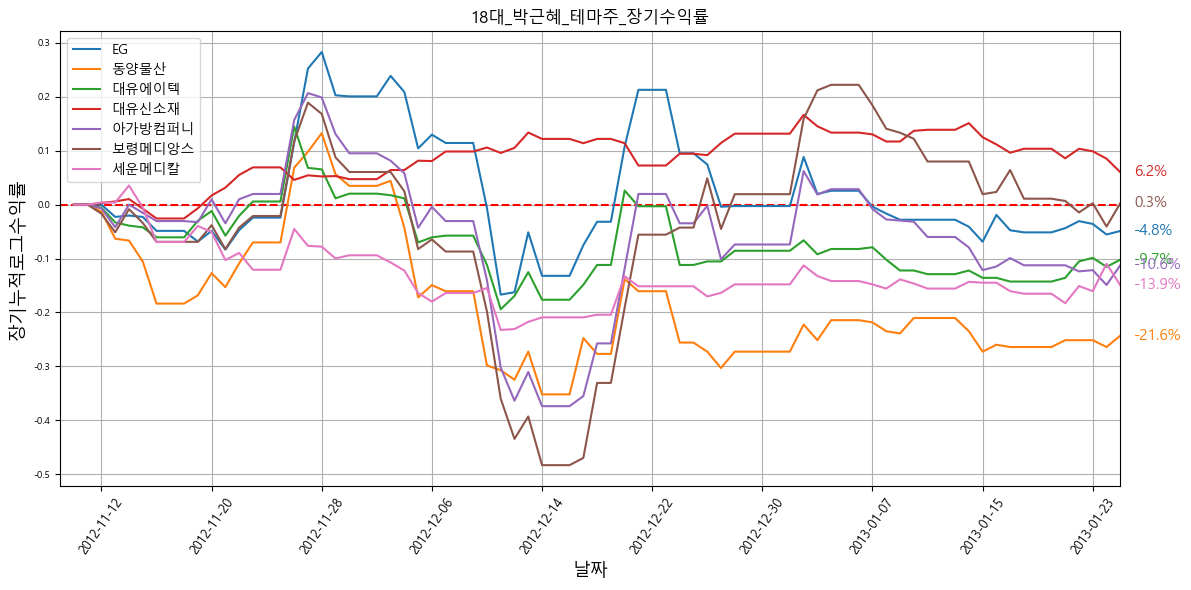

In [5]:
# 장기 수익률
# 누적 로그 수익률 계산
daily = thema.resample('d').last()
d_df = daily.pct_change()
daily_log_returns = d_df.apply(lambda x: np.log(1 + x)).cumsum() #로그 누적 수익률

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.axhline(y=0.0, color='red', linestyle='--')  # 수익률 0 기준선

# 종목 컬럼과 라벨
columns = ['thema1', 'thema2', 'thema3', 'thema4', 'thema6', 'thema7', 'thema8']
labels = ['EG','동양물산','대유에이텍','대유신소재','아가방컴퍼니','보령메디앙스','세운메디칼']  # 이 부분 수정해주세요.
colors = plt.cm.tab10.colors

for i, (col, label) in enumerate(zip(columns, labels)):
    plt.plot(daily_log_returns.index, daily_log_returns[col], label=label, color=colors[i % 10])

    last_date = daily_log_returns.index[-1]
    log_return = daily_log_returns[col].iloc[-1]
    normal_return = np.exp(log_return) - 1  # 로그 수익률을 보기 쉽게 다시 일반수익률로 

    plt.text(last_date + pd.Timedelta(days=1),  
             log_return,
             f'{normal_return * 100:.1f}%',   
             fontsize=11,
             va='center',
             ha='left',
             color=colors[i % 10])
    
plt.xlim(daily_log_returns.index[0], daily_log_returns.index[-1]) 

plt.xticks(fontsize=9, rotation=55)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=8)) #몇 일 간격으로 y축에 날짜가 나오게 할지 , 장기의 경우 8일 정도로 하면 좋을듯 합니다.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.yticks(fontsize=7)

plt.xlabel('날짜', fontsize=13)
plt.ylabel('장기누적로그수익률', fontsize=13)
plt.title('18대_박근혜_테마주_장기수익률')
plt.legend(fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()

label_dict = {
    'thema1': 'EG',
    'thema2': '동양물산',
    'thema3': '대유에이텍',
    'thema4': '대유신소재',
    'thema6' : '아가방컴퍼니',
    'thema7' : '보령메디앙스',
    'thema8' : '세운메디칼'
}

# 열 이름을 종목명으로 바꿔 저장
daily_log_returns_named = daily_log_returns.rename(columns=label_dict)

# 누적 로그 수익률 → 일반 수익률로 변환
daily_normal_returns = np.exp(daily_log_returns_named) - 1

# 퍼센트 단위로 변환
daily_normal_returns_percent = daily_normal_returns * 100

# 저장
daily_normal_returns_percent.to_csv('18대_박근혜_테마주_장기수익률.csv', encoding='utf-8-sig')